In [14]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [15]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [16]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [17]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [18]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

603

In [19]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cape town
Processing Record 2 of Set 1 | danielskuil
Processing Record 3 of Set 1 | quang ngai
Processing Record 4 of Set 1 | kapaa
Processing Record 5 of Set 1 | farah
Processing Record 6 of Set 1 | georgetown
Processing Record 7 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 8 of Set 1 | upernavik
Processing Record 9 of Set 1 | port alfred
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | phatthalung
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | kapoeta
Processing Record 14 of Set 1 | innisfail
Processing Record 15 of Set 1 | bredasdorp
Processing Record 16 of Set 1 | meulaboh
Processing Record 17 of Set 1 | jacareacanga
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | hasaki
Processing Record 20 of Set 1 | indian head
Processing Record 21 of Set 1 | lompoc
Processing Record 22 of Set 1 | attawapiskat


Processing Record 41 of Set 4 | mecca
Processing Record 42 of Set 4 | lalmohan
Processing Record 43 of Set 4 | mascota
Processing Record 44 of Set 4 | tumannyy
City not found. Skipping...
Processing Record 45 of Set 4 | rebrikha
Processing Record 46 of Set 4 | caravelas
Processing Record 47 of Set 4 | saldanha
Processing Record 48 of Set 4 | illoqqortoormiut
City not found. Skipping...
Processing Record 49 of Set 4 | hope
Processing Record 50 of Set 4 | lebu
Processing Record 1 of Set 5 | kruisfontein
Processing Record 2 of Set 5 | belushya guba
City not found. Skipping...
Processing Record 3 of Set 5 | bethel
Processing Record 4 of Set 5 | san quintin
Processing Record 5 of Set 5 | bundi
Processing Record 6 of Set 5 | samusu
City not found. Skipping...
Processing Record 7 of Set 5 | tsihombe
City not found. Skipping...
Processing Record 8 of Set 5 | alice springs
Processing Record 9 of Set 5 | thompson
Processing Record 10 of Set 5 | mimongo
Processing Record 11 of Set 5 | harper
Proc

Processing Record 31 of Set 8 | welahan
Processing Record 32 of Set 8 | takoradi
Processing Record 33 of Set 8 | san matias
Processing Record 34 of Set 8 | seymchan
Processing Record 35 of Set 8 | asau
Processing Record 36 of Set 8 | sinnamary
Processing Record 37 of Set 8 | de aar
Processing Record 38 of Set 8 | mucurapo
Processing Record 39 of Set 8 | pangnirtung
Processing Record 40 of Set 8 | oriximina
Processing Record 41 of Set 8 | nemuro
Processing Record 42 of Set 8 | uzhur-4
City not found. Skipping...
Processing Record 43 of Set 8 | nizhniy kuranakh
Processing Record 44 of Set 8 | nelson bay
Processing Record 45 of Set 8 | jinka
Processing Record 46 of Set 8 | almaznyy
Processing Record 47 of Set 8 | inirida
Processing Record 48 of Set 8 | wanlaweyn
Processing Record 49 of Set 8 | codajas
Processing Record 50 of Set 8 | port moresby
Processing Record 1 of Set 9 | shache
Processing Record 2 of Set 9 | griffith
Processing Record 3 of Set 9 | olga
Processing Record 4 of Set 9 | 

Processing Record 18 of Set 12 | ilinskiy
Processing Record 19 of Set 12 | yanan
City not found. Skipping...
Processing Record 20 of Set 12 | babanusah
City not found. Skipping...
Processing Record 21 of Set 12 | mullaitivu
City not found. Skipping...
Processing Record 22 of Set 12 | vardo
Processing Record 23 of Set 12 | taunsa
Processing Record 24 of Set 12 | gobabis
Processing Record 25 of Set 12 | sogdiondon
City not found. Skipping...
Processing Record 26 of Set 12 | aswan
Processing Record 27 of Set 12 | yialos
City not found. Skipping...
Processing Record 28 of Set 12 | qaqortoq
Processing Record 29 of Set 12 | lingao
Processing Record 30 of Set 12 | itupiranga
Processing Record 31 of Set 12 | crab hill
City not found. Skipping...
Processing Record 32 of Set 12 | kharp
Processing Record 33 of Set 12 | dharchula
Processing Record 34 of Set 12 | valentigney
Processing Record 35 of Set 12 | brae
Processing Record 36 of Set 12 | sofiysk
City not found. Skipping...
Processing Record 

In [20]:
len(city_data)

554

In [21]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cape Town,-33.9258,18.4232,67.12,78,20,4.00,ZA,2021-12-12 18:46:14
1,Danielskuil,-28.1887,23.5395,74.50,41,50,2.51,ZA,2021-12-12 18:46:14
2,Quang Ngai,15.1167,108.8000,69.22,90,97,6.40,VN,2021-12-12 18:45:54
3,Kapaa,22.0752,-159.3190,75.52,79,20,1.01,US,2021-12-12 18:46:14
4,Farah,32.5000,62.5000,44.47,36,5,3.31,AF,2021-12-12 18:46:14
5,Georgetown,5.4112,100.3354,80.89,83,40,8.01,MY,2021-12-12 18:45:14
6,Upernavik,72.7868,-56.1549,6.35,92,100,9.98,GL,2021-12-12 18:46:15
7,Port Alfred,-33.5906,26.8910,70.84,90,100,7.54,ZA,2021-12-12 18:46:15
8,Avarua,-21.2078,-159.7750,73.45,100,75,13.80,CK,2021-12-12 18:46:16
9,Phatthalung,7.5000,100.0833,76.30,82,100,7.61,TH,2021-12-12 18:46:16


In [24]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cape Town,ZA,2021-12-12 18:46:14,-33.9258,18.4232,67.12,78,20,4.00
1,Danielskuil,ZA,2021-12-12 18:46:14,-28.1887,23.5395,74.50,41,50,2.51
2,Quang Ngai,VN,2021-12-12 18:45:54,15.1167,108.8000,69.22,90,97,6.40
3,Kapaa,US,2021-12-12 18:46:14,22.0752,-159.3190,75.52,79,20,1.01
4,Farah,AF,2021-12-12 18:46:14,32.5000,62.5000,44.47,36,5,3.31
5,Georgetown,MY,2021-12-12 18:45:14,5.4112,100.3354,80.89,83,40,8.01
6,Upernavik,GL,2021-12-12 18:46:15,72.7868,-56.1549,6.35,92,100,9.98
7,Port Alfred,ZA,2021-12-12 18:46:15,-33.5906,26.8910,70.84,90,100,7.54
8,Avarua,CK,2021-12-12 18:46:16,-21.2078,-159.7750,73.45,100,75,13.80
9,Phatthalung,TH,2021-12-12 18:46:16,7.5000,100.0833,76.30,82,100,7.61


In [26]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [27]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [28]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1639336306.7158709

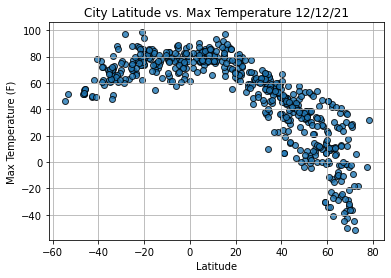

In [29]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

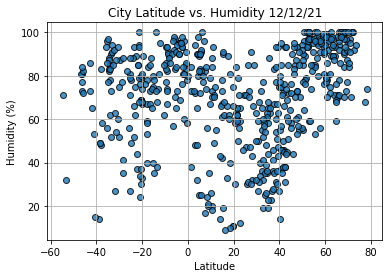

In [30]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

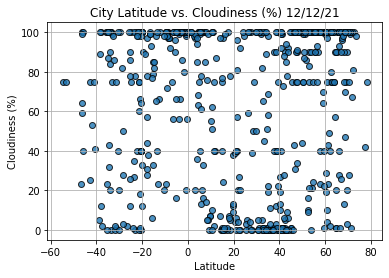

In [31]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

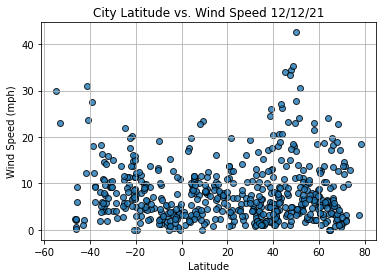

In [32]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [33]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [35]:
index13 = city_data_df.loc[13]
index13

City                   Bredasdorp
Country                        ZA
Date          2021-12-12 18:46:12
Lat                      -34.5322
Lng                       20.0403
Max Temp                    65.52
Humidity                       82
Cloudiness                    100
Wind Speed                   4.61
Name: 13, dtype: object

In [37]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

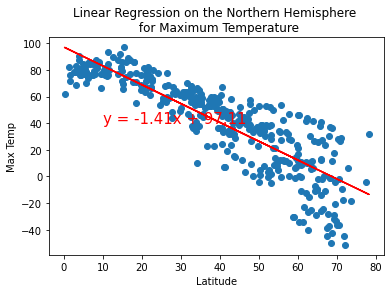

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

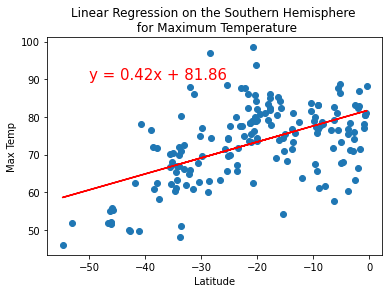

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

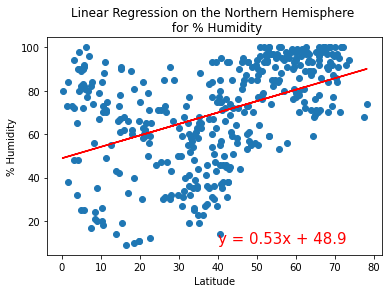

In [48]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

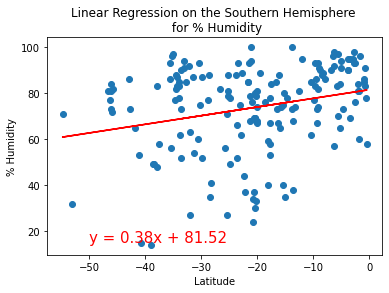

In [49]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

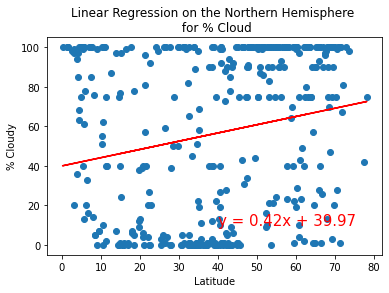

In [50]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloud', '% Cloudy',(40,10))

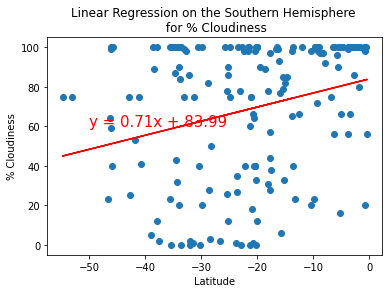

In [52]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

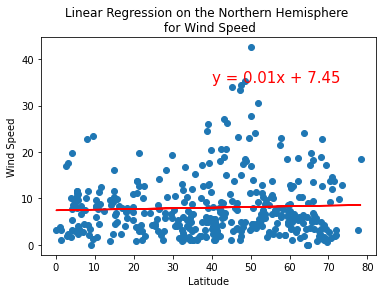

In [54]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

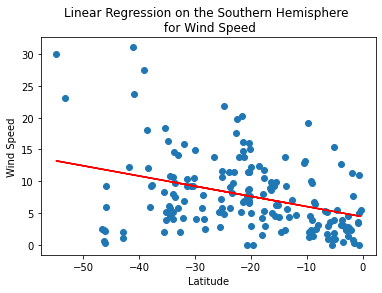

In [55]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))